In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import os
import tensorflow as tf
from tensorflow.keras.preprocessing import image

sns.set_style('darkgrid')

Let's first create a dataframe that contains the path to each picture and its corresponding label (fire or non fire).

In [ ]:
#create an empty DataFrame
df = pd.DataFrame(columns=['path','label'])

#loop over fire images and label them 1
for dirname, _, filenames in os.walk('/content/drive/MyDrive/fire detection/fire_dataset/fire_images'):
    for filename in filenames:
        #print(os.path.join(dirname, filename))
        df = df.append(pd.DataFrame([[os.path.join(dirname, filename),'fire']],columns=['path','label']))

#loop over non fire images and label them 0
for dirname, _, filenames in os.walk('/content/drive/MyDrive/fire detection/fire_dataset/non_fire_images'):
    for filename in filenames:
        df = df.append(pd.DataFrame([[os.path.join(dirname, filename),'non_fire']],columns=['path','label']))
        #print(os.path.join(dirname, filename))

#shuffle the dataset for redistribute the labels
df = df.sample(frac=1).reset_index(drop=True)
df.head(10)

<ipython-input-2-8c61ec91c1f1>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame([[os.path.join(dirname, filename),'fire']],columns=['path','label']))
<ipython-input-2-8c61ec91c1f1>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame([[os.path.join(dirname, filename),'fire']],columns=['path','label']))
<ipython-input-2-8c61ec91c1f1>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame([[os.path.join(dirname, filename),'fire']],columns=['path','label']))
<ipython-input-2-8c61ec91c1f1>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame([[

path     label
0  /content/drive/MyDrive/fire detection/fire_dat...  non_fire
1  /content/drive/MyDrive/fire detection/fire_dat...      fire
2  /content/drive/MyDrive/fire detection/fire_dat...      fire
3  /content/drive/MyDrive/fire detection/fire_dat...      fire
4  /content/drive/MyDrive/fire detection/fire_dat...      fire
5  /content/drive/MyDrive/fire detection/fire_dat...      fire
6  /content/drive/MyDrive/fire detection/fire_dat...      fire
7  /content/drive/MyDrive/fire detection/fire_dat...  non_fire
8  /content/drive/MyDrive/fire detection/fire_dat...  non_fire
9  /content/drive/MyDrive/fire detection/fire_dat...      fire

Great! the dataset has been created. Let's see how well the data is shuffled.

In [ ]:
fig = px.scatter(data_frame = df,x=df.index,y='label',color='label',title='Distribution of fire and non-fire images along the length of the dataframe')
fig.update_traces(marker_size=2)

The shuffling has taken place well.

Let's visualize the countplot of the data

In [ ]:
fig = make_subplots(rows=1, cols=2, specs=[[{"type": "xy"}, {"type": "pie"}]])


fig.add_trace(go.Bar(x =df['label'].value_counts().index,y=df['label'].value_counts().to_numpy(),marker_color=['darkorange','green'],showlegend=False),row=1,col=1)

fig.add_trace(go.Pie(
     values=df['label'].value_counts().to_numpy(),
     labels=df['label'].value_counts().index,
    marker=dict(colors=['darkorange','green'])),
    row=1, col=2)

Non fire label has less number of images. The dataset is imbalanced

##Visualizing the images with fire¶

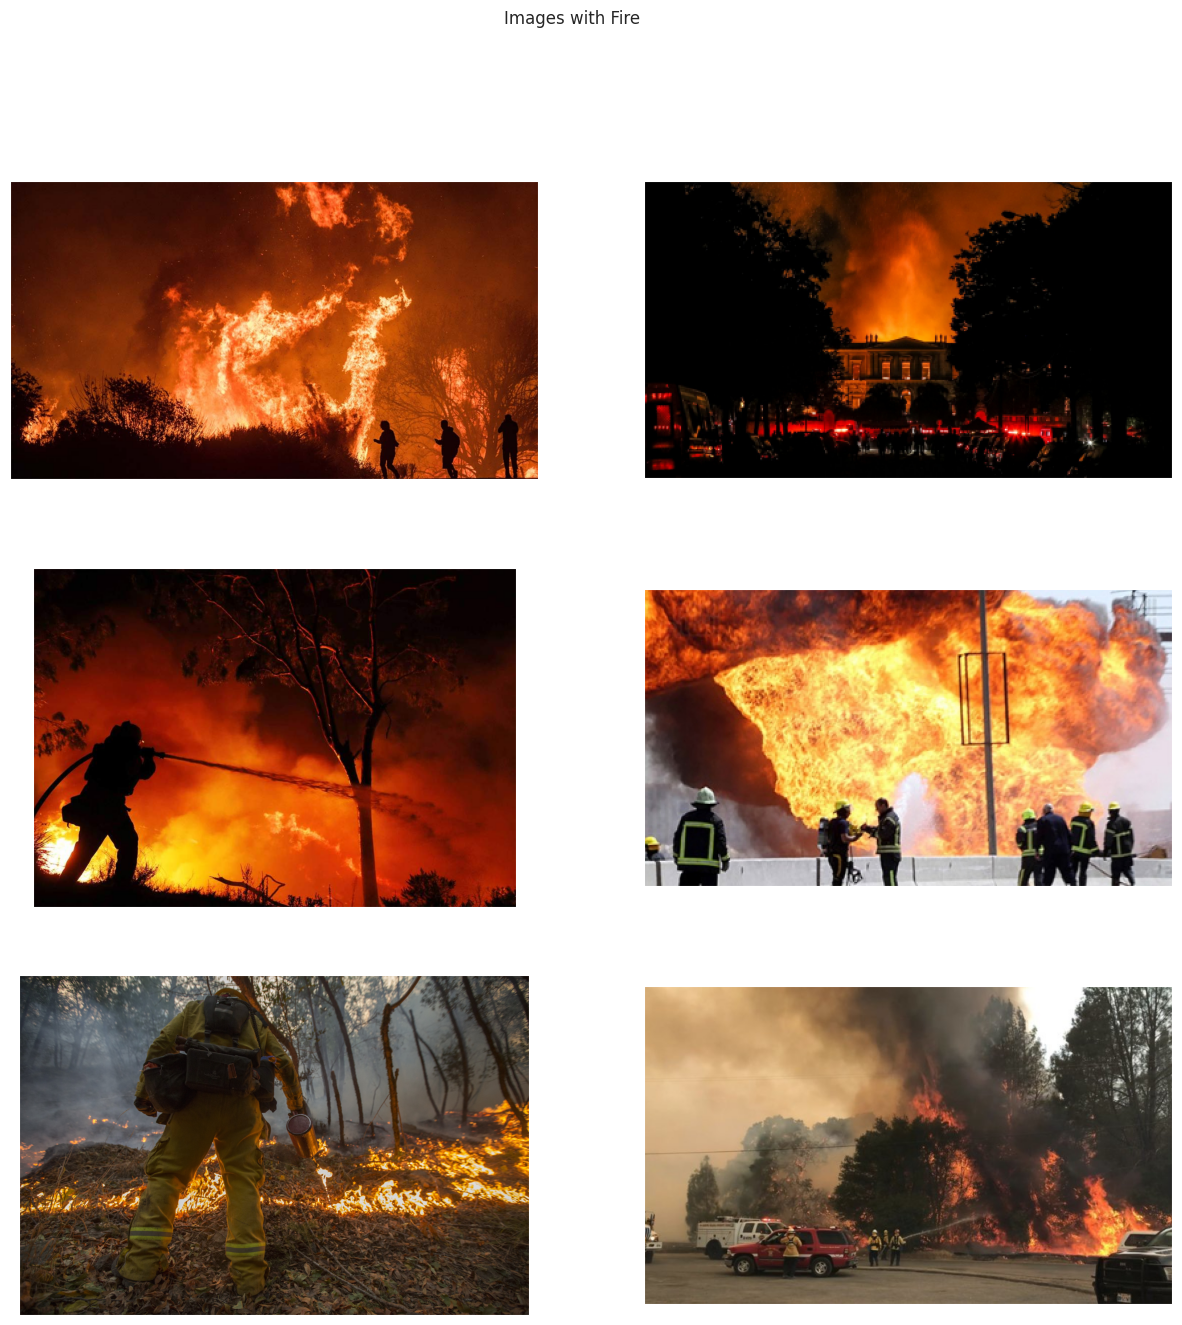

In [ ]:
label = 'fire' #label for images with fire
data = df[df['label'] == label]
sns.set_style('dark')


pics = 6 #set the number of pics
fig,ax = plt.subplots(int(pics//2),2,figsize=(15,15))
plt.suptitle('Images with Fire')
ax = ax.ravel()
for i in range((pics//2)*2):
    path = data.sample(1).loc[:,'path'].to_numpy()[0]
    img = image.load_img(path)
    img = image.img_to_array(img)/255
    ax[i].imshow(img)
    ax[i].axes.xaxis.set_visible(False)
    ax[i].axes.yaxis.set_visible(False)

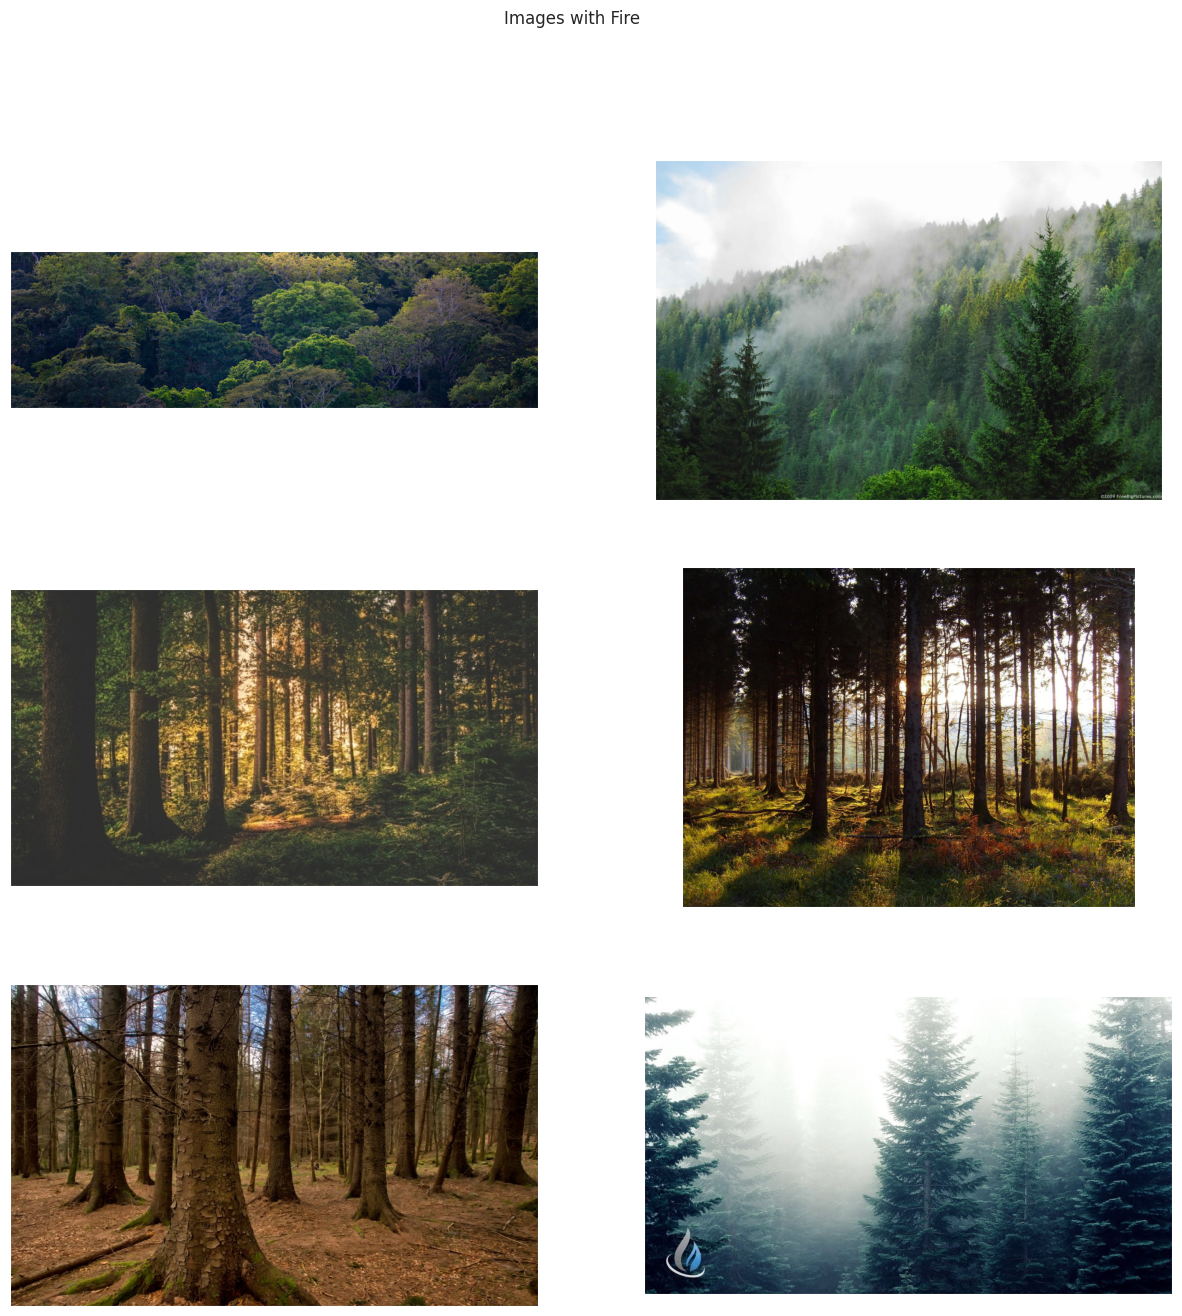

In [ ]:
label = 'non_fire' #label for images without fire
data = df[df['label'] == label]
sns.set_style('dark')


pics = 6 #set the number of pics
fig,ax = plt.subplots(int(pics//2),2,figsize=(15,15))
plt.suptitle('Images with Fire')
ax = ax.ravel()
for i in range((pics//2)*2):
    path = data.sample(1).loc[:,'path'].to_numpy()[0]
    img = image.load_img(path)
    img = image.img_to_array(img)/255
    ax[i].imshow(img)
    ax[i].axes.xaxis.set_visible(False)
    ax[i].axes.yaxis.set_visible(False)

As you can see, the sizes of the images are different. Let's visualize the distribution of their shapes

In [ ]:
def shaper(row):
    shape = image.load_img(row['path']).size
    row['height'] = shape[1]
    row['width'] = shape[0]
    return row
df = df.apply(shaper,axis=1)
df.head(5)

path     label  height  width
0  /content/drive/MyDrive/fire detection/fire_dat...  non_fire    1000   1500
1  /content/drive/MyDrive/fire detection/fire_dat...      fire     400    600
2  /content/drive/MyDrive/fire detection/fire_dat...      fire     316    648
3  /content/drive/MyDrive/fire detection/fire_dat...      fire    2848   4288
4  /content/drive/MyDrive/fire detection/fire_dat...      fire    2426   3866

## Visualizing Shape Distribution


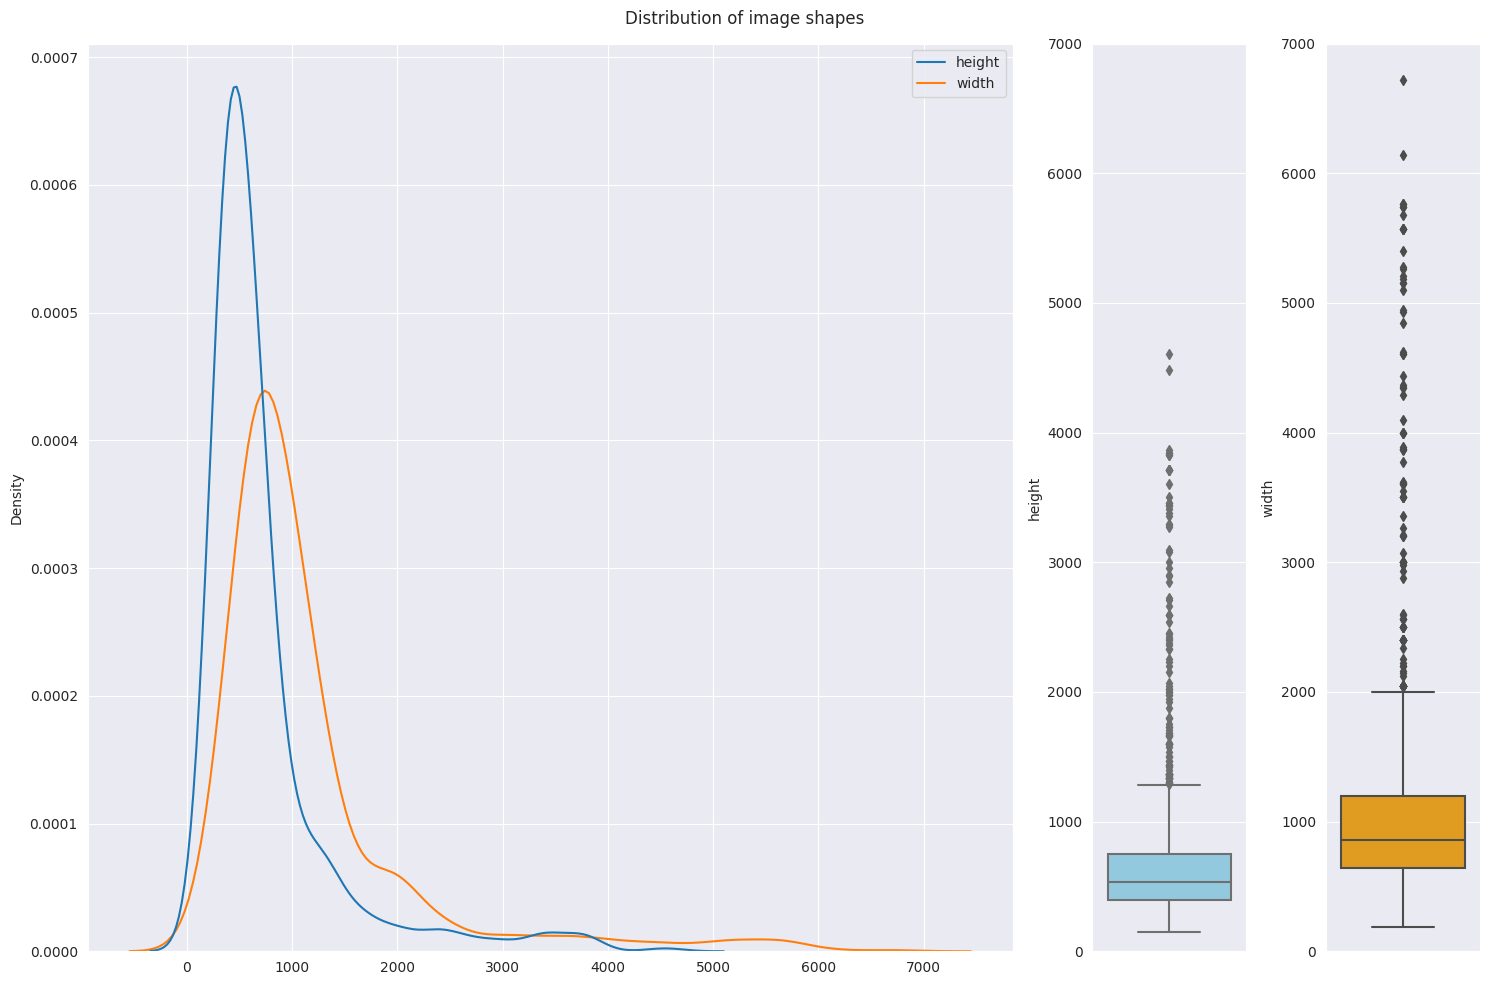

In [ ]:
sns.set_style('darkgrid')
fig,(ax1,ax2,ax3) = plt.subplots(1,3,gridspec_kw={'width_ratios': [3,0.5,0.5]},figsize=(15,10))
sns.kdeplot(data=df.drop(columns=['path','label']),ax=ax1,legend=True)
sns.boxplot(data=df,y='height',ax=ax2,color='skyblue')
sns.boxplot(data=df,y='width',ax=ax3,color='orange')
plt.suptitle('Distribution of image shapes')
ax3.set_ylim(0,7000)
ax2.set_ylim(0,7000)
plt.tight_layout()

The height and width of images vary too much. We have to reshape them to a fixed shape before training

## Image Generation or Augmentation

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
generator = ImageDataGenerator(
    rotation_range= 20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range = 2,
    zoom_range=0.2,
    rescale = 1/255,
    validation_split=0.2,
)

Creating the training and test generator

We will use the flow_from_dataframe method of the ImageDataGenerator class. It will take the path of the images from the dataframe along with their labels. We construct two generators, one for training and the other for validation.

Note: Our labels are strings 'fire ' and 'non_fire'. Image generator will automatically encode them to integer labels.

In [ ]:
train_gen = generator.flow_from_dataframe(df,x_col='path',y_col='label',images_size=(256,256),class_mode='binary',subset='training')
val_gen = generator.flow_from_dataframe(df,x_col='path',y_col='label',images_size=(256,256),class_mode='binary',subset='validation')

Found 800 validated image filenames belonging to 2 classes.
Found 199 validated image filenames belonging to 2 classes.


Class indices assigned by the Image generator

In [ ]:
class_indices = {}
for key in train_gen.class_indices.keys():
    class_indices[train_gen.class_indices[key]] = key

print(class_indices)

{0: 'fire', 1: 'non_fire'}


Hence an image predicted 0 will contain fire and 1 won't.

## Visualizing the generated images in training set

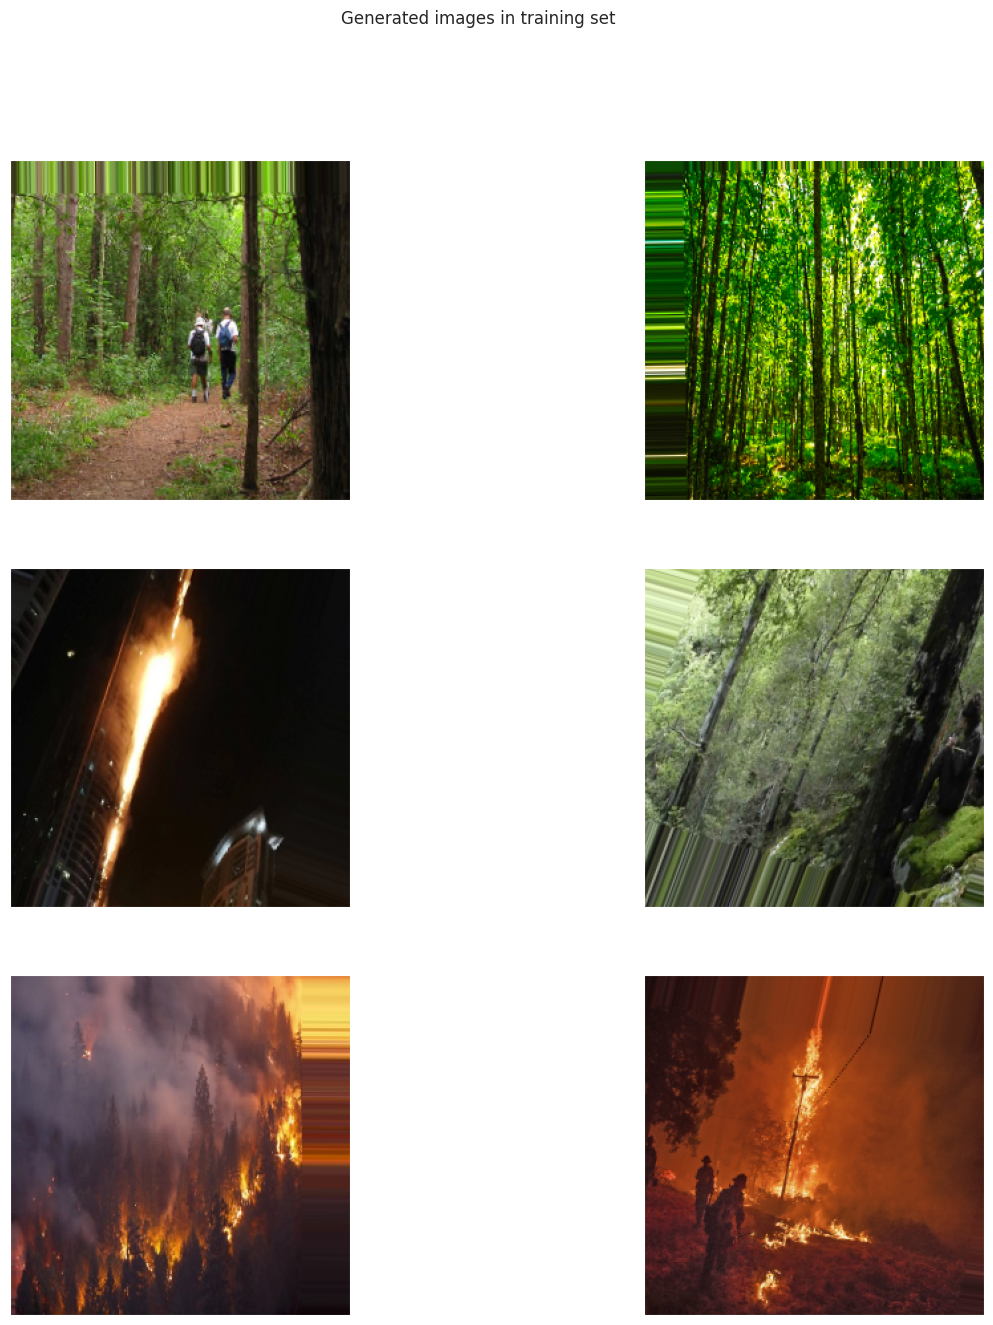

In [ ]:
sns.set_style('dark')
pics = 6 #set the number of pics
fig,ax = plt.subplots(int(pics//2),2,figsize=(15,15))
plt.suptitle('Generated images in training set')
ax = ax.ravel()
for i in range((pics//2)*2):
    ax[i].imshow(train_gen[0][0][i])
    ax[i].axes.xaxis.set_visible(False)
    ax[i].axes.yaxis.set_visible(False)

## Creating the model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense

In [ ]:
model = Sequential()
model.add(Conv2D(filters=32,kernel_size = (2,2),activation='relu',input_shape = (256,256,3)))
model.add(MaxPool2D())
model.add(Conv2D(filters=64,kernel_size=(2,2),activation='relu'))
model.add(MaxPool2D())
model.add(Conv2D(filters=128,kernel_size=(2,2),activation='relu'))
model.add(MaxPool2D())
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dense(32,activation = 'relu'))
model.add(Dense(1,activation = 'sigmoid'))

We increase the number of filters as we add more layers because initially there will be a lot of noise present in the input and we only need to capture the important information. Later as we progress through the layers, the feature maps become nuanced and we try to capture them with more filters

## Model Summary

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 255, 255, 32)      416       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 126, 126, 64)      8256      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 63, 63, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 62, 62, 128)       32896     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 31, 31, 128)       0

Compiling the model

In [ ]:
from tensorflow.keras.metrics import Recall,AUC
from tensorflow.keras.utils import plot_model

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy',Recall(),AUC()])

Defining Callbacks

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [ ]:
early_stoppping = EarlyStopping(monitor='val_loss',patience=5,restore_best_weights=True)
reduce_lr_on_plateau = ReduceLROnPlateau(monitor='val_loss',factor=0.1,patience=5)

## Model Fitting

In [ ]:
model.fit(x=train_gen,batch_size=32,epochs=15,validation_data=val_gen,callbacks=[early_stoppping,reduce_lr_on_plateau])

Epoch 1/15
25/25 [==============================] - 47s 1s/step - loss: 0.4949 - accuracy: 0.8288 - recall: 0.5231 - auc: 0.8430 - val_loss: 0.2119 - val_accuracy: 0.8995 - val_recall: 0.9184 - val_auc: 0.9713 - lr: 0.0010
Epoch 2/15
25/25 [==============================] - 35s 1s/step - loss: 0.1434 - accuracy: 0.9450 - recall: 0.8821 - auc: 0.9798 - val_loss: 0.1377 - val_accuracy: 0.9548 - val_recall: 0.8980 - val_auc: 0.9814 - lr: 0.0010
Epoch 3/15
25/25 [==============================] - 35s 1s/step - loss: 0.1107 - accuracy: 0.9588 - recall: 0.8821 - auc: 0.9880 - val_loss: 0.1642 - val_accuracy: 0.9397 - val_recall: 0.8980 - val_auc: 0.9721 - lr: 0.0010
Epoch 4/15
25/25 [==============================] - 35s 1s/step - loss: 0.0999 - accuracy: 0.9550 - recall: 0.9179 - auc: 0.9924 - val_loss: 0.1460 - val_accuracy: 0.9698 - val_recall: 0.8776 - val_auc: 0.9672 - lr: 0.0010
Epoch 5/15
25/25 [==============================] - 38s 2s/step - loss: 0.0837 - accuracy: 0.9750 - recall: 

## Model Evaluation

Plotting metrics

In [ ]:
history= model.history.history
px.line(history,title = "Metrics Plot")

In [ ]:
eval_list = model.evaluate(val_gen,return_dict=True)
for metric in eval_list.keys():
    print(metric+f": {eval_list[metric]:.2f}")

7/7 [==============================] - 6s 834ms/step - loss: 0.1179 - accuracy: 0.9749 - recall: 0.8980 - auc: 0.9769
loss: 0.12
accuracy: 0.97
recall: 0.90
auc: 0.98


## Model creation by transfer learning

In [ ]:
from tensorflow.keras.applications import Xception
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dropout

In [ ]:
xception = Xception(include_top = False,input_shape = (256,256,3))
input_to_model = xception.input
#turn off training
xception.trainable = False

x = Flatten()(xception.output)
x = Dense(64,activation = 'relu')(x)
output_to_model = Dense(1,activation = 'sigmoid')(x)
model2 = Model(inputs = input_to_model,outputs = output_to_model)

83683744/83683744 [==============================] - 1s 0us/step


Compiling the model

In [ ]:
model2.compile(optimizer = 'adam',loss = 'binary_crossentropy',metrics = ['accuracy',Recall(),AUC()])

Fitting the model

In [ ]:
history2 = model2.fit(x = train_gen,batch_size=32,epochs=15,callbacks = [early_stoppping,reduce_lr_on_plateau],validation_data = val_gen)

Epoch 1/15
25/25 [==============================] - 43s 2s/step - loss: 2.5328 - accuracy: 0.8413 - recall_1: 0.6769 - auc_1: 0.8273 - val_loss: 0.7508 - val_accuracy: 0.9246 - val_recall_1: 0.9184 - val_auc_1: 0.9430 - lr: 0.0010
Epoch 2/15
25/25 [==============================] - 35s 1s/step - loss: 0.3481 - accuracy: 0.9538 - recall_1: 0.9282 - auc_1: 0.9707 - val_loss: 0.7298 - val_accuracy: 0.9347 - val_recall_1: 0.7959 - val_auc_1: 0.9152 - lr: 0.0010
Epoch 3/15
25/25 [==============================] - 37s 1s/step - loss: 0.1817 - accuracy: 0.9712 - recall_1: 0.9641 - auc_1: 0.9875 - val_loss: 0.4602 - val_accuracy: 0.9548 - val_recall_1: 0.8163 - val_auc_1: 0.9486 - lr: 0.0010
Epoch 4/15
25/25 [==============================] - 39s 2s/step - loss: 0.2266 - accuracy: 0.9538 - recall_1: 0.8872 - auc_1: 0.9697 - val_loss: 0.4322 - val_accuracy: 0.9497 - val_recall_1: 0.8163 - val_auc_1: 0.9576 - lr: 0.0010
Epoch 5/15
25/25 [==============================] - 39s 2s/step - loss: 0.08

## Model Evaluation

In [ ]:
px.line(history,title='Metrics Plot')

In [ ]:
eval_list = model.evaluate(val_gen,return_dict=True)
for metric in eval_list.keys():
    print(metric+f": {eval_list[metric]:.2f}")

7/7 [==============================] - 6s 876ms/step - loss: 0.1057 - accuracy: 0.9749 - recall: 0.8980 - auc: 0.9880
loss: 0.11
accuracy: 0.97
recall: 0.90
auc: 0.99


## Example Prediction

Printing the image

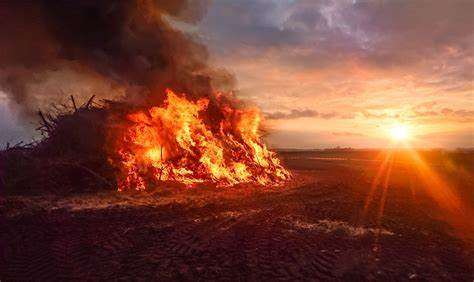

In [ ]:
#loading the image
img = image.load_img('/content/fire.jpg')
img

Resizing the image and expanding its dimension to include the batch size - 1

In [ ]:
img = image.img_to_array(img)/255
img = tf.image.resize(img,(256,256))
img = tf.expand_dims(img,axis=0)

print("Image Shape",img.shape)

Image Shape (1, 256, 256, 3)


Prediction

In [ ]:
prediction = int(tf.round(model2.predict(x=img)).numpy()[0][0])
print("The predicted value is: ",prediction,"and the predicted label is:",class_indices[prediction])

1/1 [==============================] - 2s 2s/step
The predicted value is:  0 and the predicted label is: fire


In [ ]:
model.save('fire.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning:

You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.

